### Analyzing the dataset and the correlations

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [12]:
df = pd.read_csv('GDSI_OpenDataset_Final.csv')
df

,secret_name,report_source,age_in_cat,bmi_in_cat2,covid19_admission_hospital,covid19_confirmed_case,covid19_diagnosis,covid19_has_symptoms,covid19_icu_stay,covid19_outcome_recovered,...,com_chronic_kidney_disease,com_chronic_liver_disease,com_diabetes,com_hypertension,com_immunodeficiency,com_lung_disease,com_malignancy,com_neurological_neuromuscular,stop_or_end_date_combined,comorbidities_other
0,C_1005,clinicians,1,NaN,no,yes,confirmed,NaN,no,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C_1008,clinicians,1,NaN,no,yes,confirmed,yes,no,yes,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN
2,C_1037,clinicians,1,NaN,no,yes,confirmed,yes,no,not_applicable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_1039,clinicians,1,NaN,no,no,suspected,yes,no,not_applicable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C_1061,clinicians,1,NaN,yes,no,suspected,yes,no,yes,...,no,no,no,yes,no,no,no,no,24/04/2020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,P_916,patients,2,not_overweight,no,no,not_suspected,no,no,not_applicable,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,18/04/2020,NaN
1137,P_919,patients,2,not_overweight,no,no,not_suspected,no,no,not_applicable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24/12/2016,NaN
1138,P_953,patients,2,not_overweight,no,no,not_suspected,no,no,not_applicable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20/04/2020,NaN
1139,P_954,patients,2,not_overweight,no,no,suspected,yes,no,not_applicable,...,no,no,no,no,no,yes,no,no,NaN,1.0


### Feature importances

                                              Feature  Importance
14                      covid19_outcome_recovered_yes    0.484156
12                           covid19_has_symptoms_yes    0.078734
10                    covid19_diagnosis_not_suspected    0.051758
2                                          year_onset    0.043980
19                            covid19_sympt_fever_yes    0.026773
20                 covid19_sympt_loss_smell_taste_yes    0.021217
6                              report_source_patients    0.019022
16                           covid19_sympt_chills_yes    0.018081
15                         covid19_self_isolation_yes    0.017756
11                        covid19_diagnosis_suspected    0.014642
24                 covid19_sympt_shortness_breath_yes    0.013717
39           dmt_type_overall_currently on fingolimod    0.011344
36  dmt_type_overall_currently on another drug not...    0.010963
38    dmt_type_overall_currently on dimethyl fumarate    0.010959
17        

C:\Users\DELL\AppData\Local\Temp\ipykernel_3160\1591704259.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_df, x='Importance', y='Feature', palette='viridis')


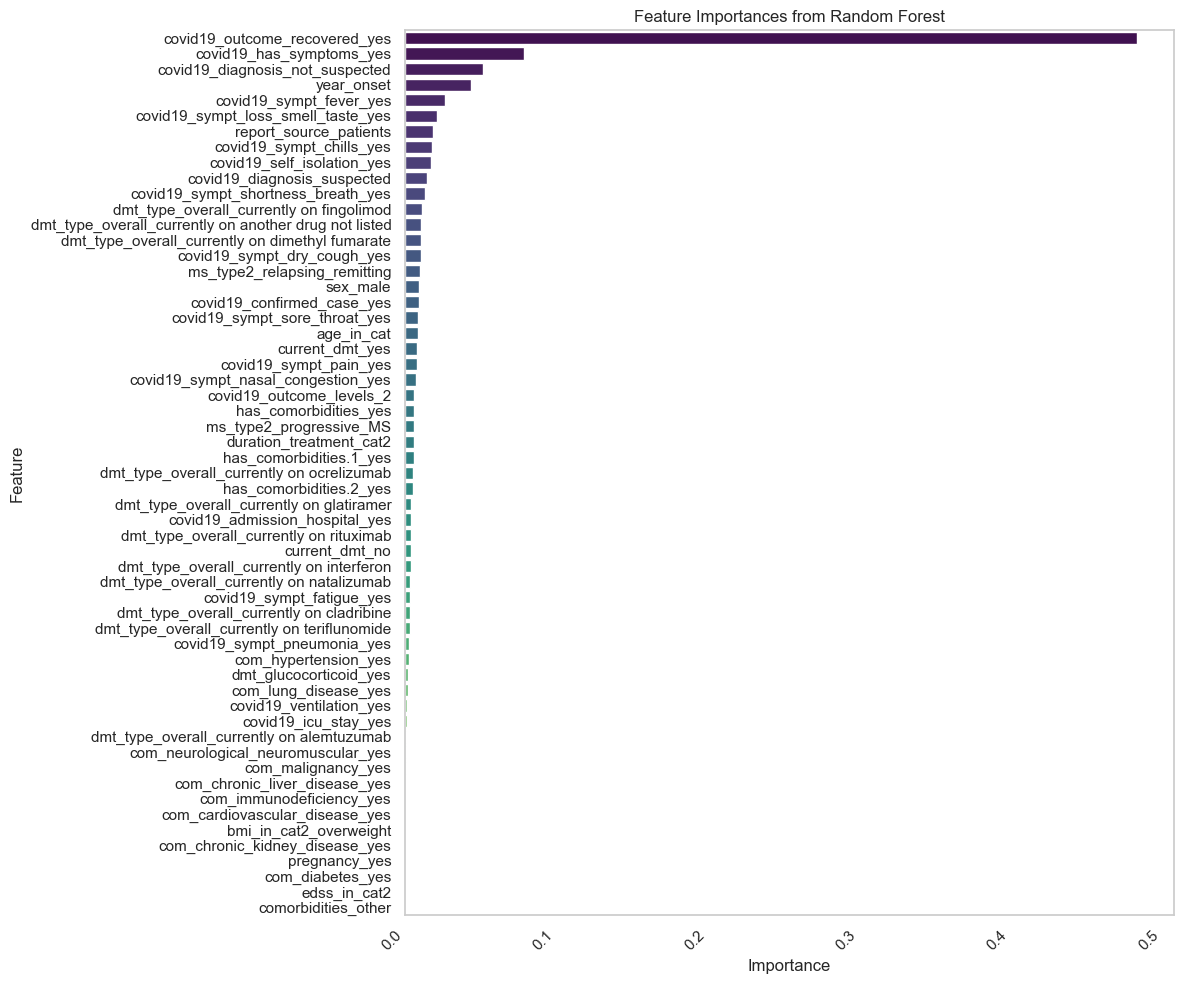

In [28]:
original_target = df['covid19_outcome_recovered']
filtered_target = original_target[original_target != 'not_applicable']
encoded_target = (filtered_target == 'yes').astype(int)

filtered_df = df.loc[filtered_target.index]  

numeric_cols = filtered_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = filtered_df.select_dtypes(include=['object']).columns

numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

filtered_df[numeric_cols] = numeric_imputer.fit_transform(filtered_df[numeric_cols])
filtered_df[categorical_cols] = categorical_imputer.fit_transform(filtered_df[categorical_cols])

encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_encoded = encoder.fit_transform(filtered_df[categorical_cols])

encoded_features = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(categorical_encoded, columns=encoded_features)

cleaned_df = cleaned_df.loc[:, ~cleaned_df.columns.str.startswith(('stop_or_end_date_combined', 'secret_name'))]

X = cleaned_df
y = encoded_target.reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


print(importances_df)

plt.figure(figsize=(12, 10)) 
sns.barplot(data=importances_df, x='Importance', y='Feature', palette='viridis')


plt.xticks(rotation=45, ha='right')  
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.tight_layout()  
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   secret_name                     1141 non-null   object 
 1   report_source                   1141 non-null   object 
 2   age_in_cat                      1141 non-null   int64  
 3   bmi_in_cat2                     890 non-null    object 
 4   covid19_admission_hospital      1141 non-null   object 
 5   covid19_confirmed_case          1141 non-null   object 
 6   covid19_diagnosis               1141 non-null   object 
 7   covid19_has_symptoms            1133 non-null   object 
 8   covid19_icu_stay                1138 non-null   object 
 9   covid19_outcome_recovered       1141 non-null   object 
 10  covid19_self_isolation          1126 non-null   object 
 11  covid19_sympt_chills            248 non-null    object 
 12  covid19_sympt_dry_cough         28

In [15]:
df['stop_or_end_date_combined'] = pd.to_datetime(df['stop_or_end_date_combined'], dayfirst=True)


In [16]:
perc_missing_data = df.isnull().sum()*100/len(df) 
perc_missing_data.sort_values(ascending = False)

df['stop_or_end_date_combined'] = df['stop_or_end_date_combined'].fillna(df['stop_or_end_date_combined'].mean())


col_to_drop =perc_missing_data[perc_missing_data>75].keys() 

df.drop(col_to_drop, axis=1, inplace=True) 

In [17]:
df1 = df.drop(columns=['covid19_sympt_fatigue', 'secret_name'])

In [18]:
df1

,report_source,age_in_cat,bmi_in_cat2,covid19_admission_hospital,covid19_confirmed_case,covid19_diagnosis,covid19_has_symptoms,covid19_icu_stay,covid19_outcome_recovered,covid19_self_isolation,...,pregnancy,sex,year_onset,ms_type2,current_or_former_smoker,dmt_type_overall,covid19_outcome_levels_2,has_comorbidities.1,has_comorbidities.2,stop_or_end_date_combined
0,clinicians,1,NaN,no,yes,confirmed,NaN,no,yes,yes,...,NaN,female,NaN,relapsing_remitting,NaN,currently on fingolimod,0,no,no,2019-10-23 04:53:16.097560832
1,clinicians,1,NaN,no,yes,confirmed,yes,no,yes,yes,...,NaN,female,NaN,relapsing_remitting,NaN,currently on natalizumab,0,yes,yes,2019-10-23 04:53:16.097560832
2,clinicians,1,NaN,no,yes,confirmed,yes,no,not_applicable,yes,...,NaN,female,NaN,relapsing_remitting,NaN,currently on fingolimod,0,no,no,2019-10-23 04:53:16.097560832
3,clinicians,1,NaN,no,no,suspected,yes,no,not_applicable,yes,...,NaN,female,NaN,relapsing_remitting,NaN,currently on another drug not listed,0,no,no,2019-10-23 04:53:16.097560832
4,clinicians,1,NaN,yes,no,suspected,yes,no,yes,yes,...,no,female,2007.0,relapsing_remitting,NaN,currently on another drug not listed,1,yes,yes,2020-04-24 00:00:00.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,patients,2,not_overweight,no,no,not_suspected,no,no,not_applicable,yes,...,NaN,male,2017.0,other,yes,currently on fingolimod,0,yes,yes,2020-04-18 00:00:00.000000000
1137,patients,2,not_overweight,no,no,not_suspected,no,no,not_applicable,no,...,NaN,male,2000.0,progressive_MS,yes,currently not using any DMT,0,no,no,2016-12-24 00:00:00.000000000
1138,patients,2,not_overweight,no,no,not_suspected,no,no,not_applicable,no,...,NaN,male,1996.0,relapsing_remitting,NaN,currently on another drug not listed,0,no,no,2020-04-20 00:00:00.000000000
1139,patients,2,not_overweight,no,no,suspected,yes,no,not_applicable,no,...,NaN,male,2007.0,relapsing_remitting,NaN,currently not using any DMT,0,yes,yes,2019-10-23 04:53:16.097560832


In [19]:
imputer = SimpleImputer(strategy='most_frequent')  # Initializing imputer

categorical_columns = ['current_or_former_smoker', 'pregnancy', 'bmi_in_cat2', 'dmt_type_overall']
df1[categorical_columns] = imputer.fit_transform(df1[categorical_columns])

imputer_num = SimpleImputer(strategy='median')
df1['edss_in_cat2'] = imputer_num.fit_transform(df1[['edss_in_cat2']])

low_missing_columns = ['year_onset', 'dmt_glucocorticoid', 'covid19_self_isolation', 'covid19_has_symptoms', 
                       'covid19_ventilation', 'covid19_icu_stay', 'stop_or_end_date_combined']
df1.dropna(subset=low_missing_columns, inplace=True)

df1.isnull().sum()


report_source                 0
age_in_cat                    0
bmi_in_cat2                   0
covid19_admission_hospital    0
covid19_confirmed_case        0
covid19_diagnosis             0
covid19_has_symptoms          0
covid19_icu_stay              0
covid19_outcome_recovered     0
covid19_self_isolation        0
covid19_ventilation           0
current_dmt                   0
dmt_glucocorticoid            0
edss_in_cat2                  0
has_comorbidities             0
pregnancy                     0
sex                           0
year_onset                    0
ms_type2                      0
current_or_former_smoker      0
dmt_type_overall              0
covid19_outcome_levels_2      0
has_comorbidities.1           0
has_comorbidities.2           0
stop_or_end_date_combined     0
dtype: int64

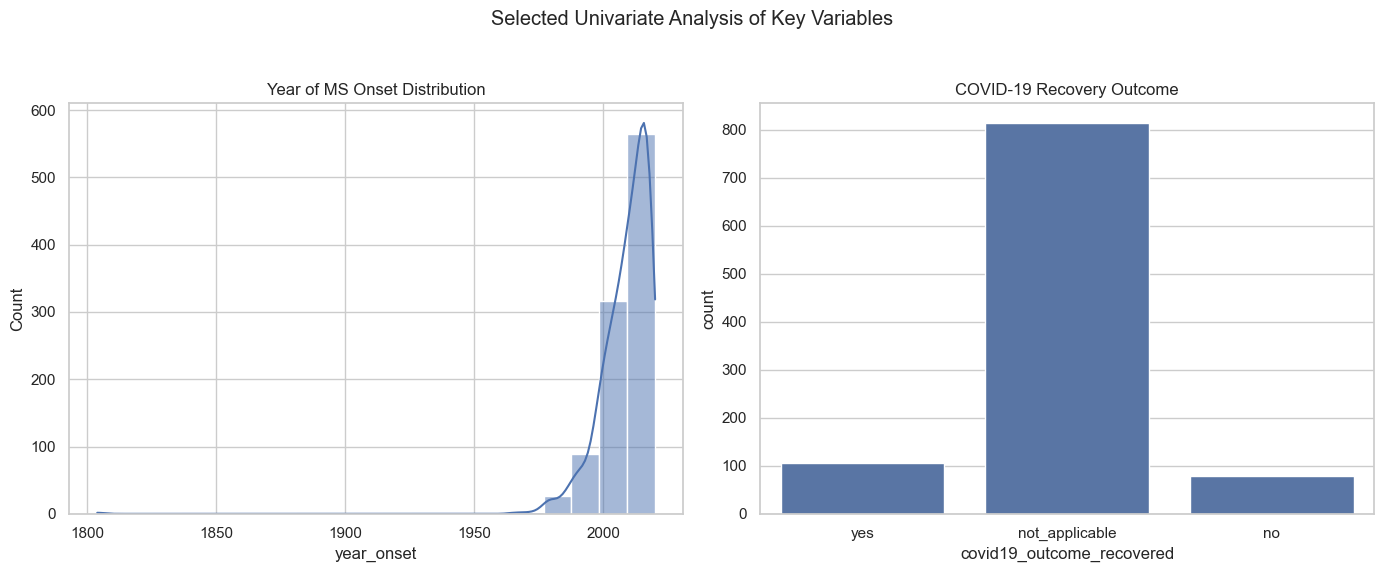

In [20]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Selected Univariate Analysis of Key Variables')

sns.histplot(data=df1, x='year_onset', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Year of MS Onset Distribution')

sns.countplot(data=df1, x='covid19_outcome_recovered', ax=axes[1])
axes[1].set_title('COVID-19 Recovery Outcome')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

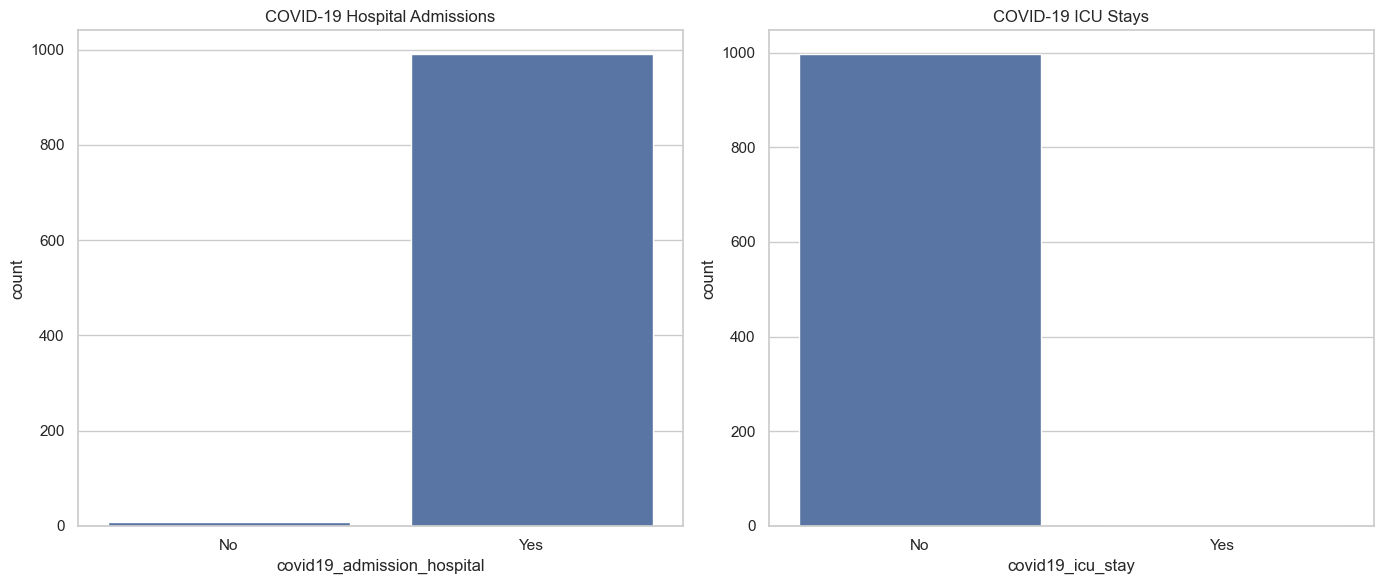

In [21]:
sns.set_style("whitegrid") 
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='covid19_admission_hospital', data=df1)
plt.title('COVID-19 Hospital Admissions')
plt.xticks([0, 1], ['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.countplot(x='covid19_icu_stay', data=df1)
plt.title('COVID-19 ICU Stays')
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

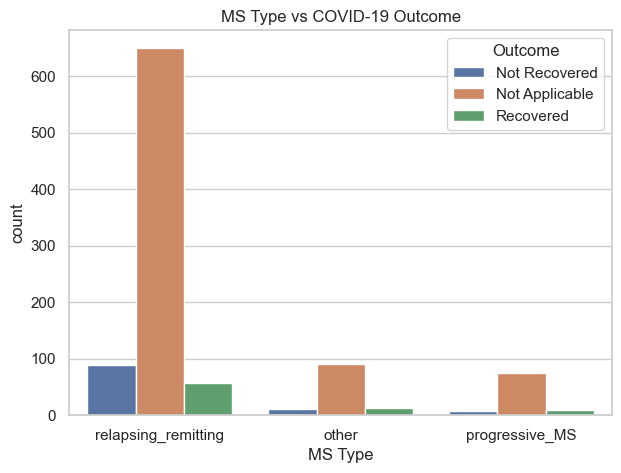

In [22]:
plt.figure(figsize=(7, 5))
sns.countplot(x='ms_type2', hue='covid19_outcome_recovered', data=df1)
plt.title('MS Type vs COVID-19 Outcome')
plt.xlabel('MS Type')
plt.legend(['Not Recovered', 'Not Applicable', 'Recovered'], title='Outcome')

plt.show()

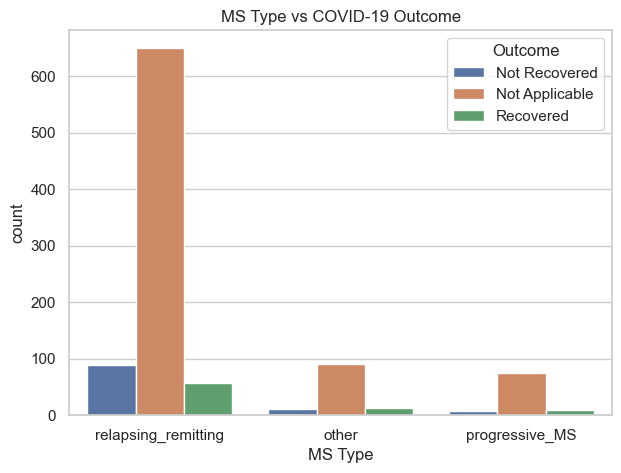

In [23]:
plt.figure(figsize=(7, 5))
sns.countplot(x='ms_type2', hue='covid19_outcome_recovered', data=df1)
plt.title('MS Type vs COVID-19 Outcome')
plt.xlabel('MS Type')
plt.legend(['Not Recovered', 'Not Applicable', 'Recovered'], title='Outcome')

plt.show()

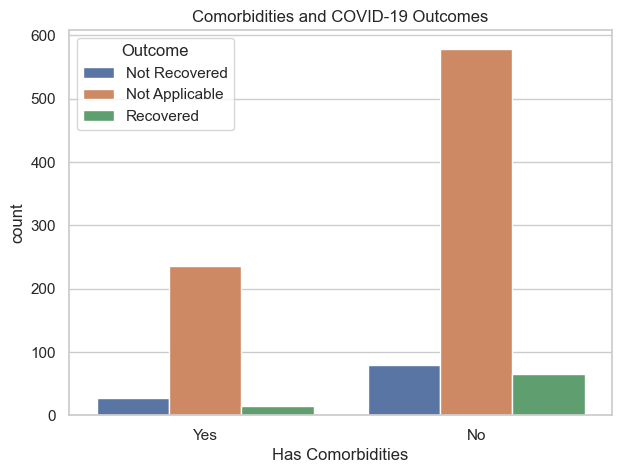

In [24]:
plt.figure(figsize=(7, 5))
sns.countplot(x='has_comorbidities', hue='covid19_outcome_recovered', data=df1)
plt.title('Comorbidities and COVID-19 Outcomes')
plt.xlabel('Has Comorbidities')
plt.xticks([0, 1], ['Yes', 'No'])
plt.legend(['Not Recovered', 'Not Applicable', 'Recovered'], title='Outcome')

plt.show()

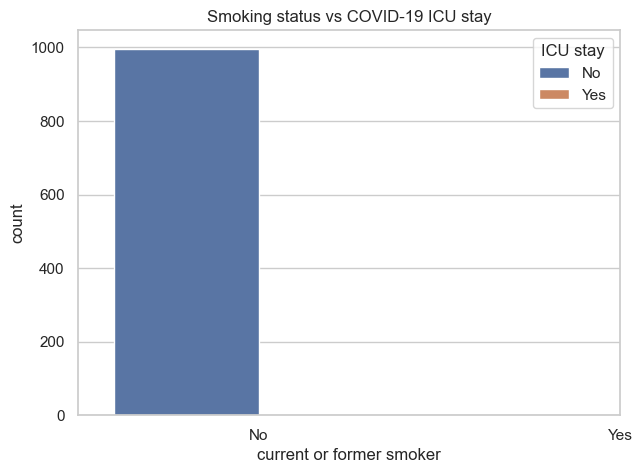

In [25]:
plt.figure(figsize=(7, 5))
sns.countplot(x='current_or_former_smoker', hue='covid19_icu_stay', data=df1)
plt.title('Smoking status vs COVID-19 ICU stay')
plt.xlabel('current or former smoker')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(['No', 'Yes'], title='ICU stay')

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3160\1976254359.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette="Blues_d")


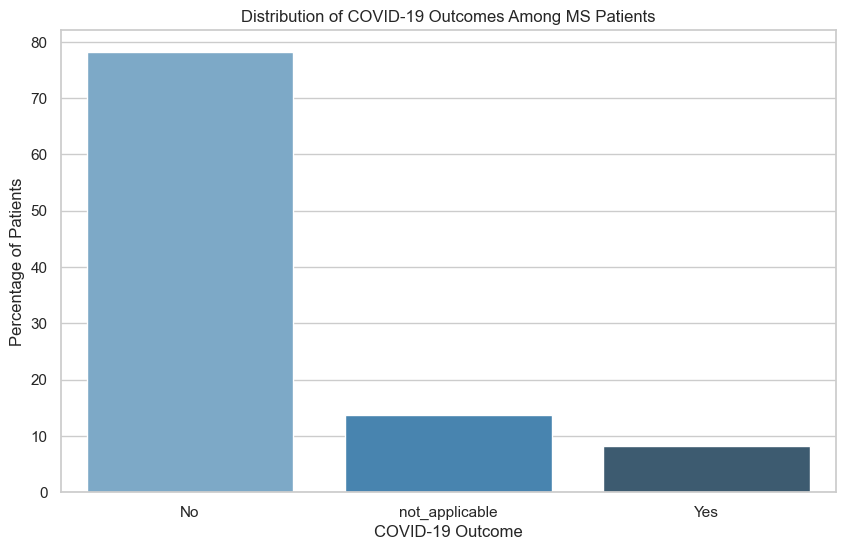

In [26]:
plt.figure(figsize=(10, 6))
outcome_counts = df['covid19_outcome_recovered'].value_counts(normalize=True) * 100
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette="Blues_d")
plt.title('Distribution of COVID-19 Outcomes Among MS Patients')
plt.ylabel('Percentage of Patients')
plt.xlabel('COVID-19 Outcome')
plt.xticks([0, 1, 2], ['No', 'not_applicable', 'Yes'])
plt.show()

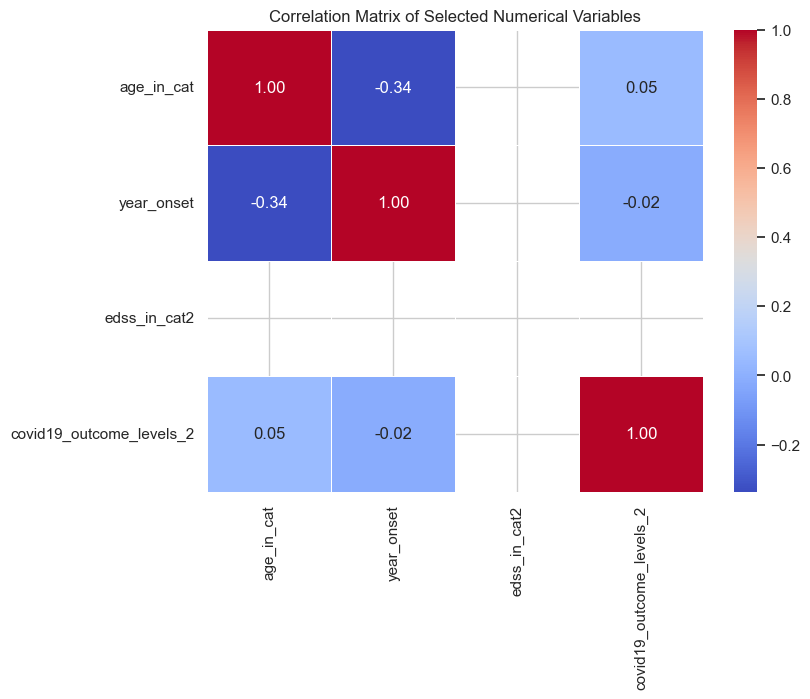

In [27]:
selected_columns = ['age_in_cat', 'year_onset', 'edss_in_cat2', 'covid19_outcome_levels_2']
data_selected = df1[selected_columns]

correlation_matrix = data_selected.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Numerical Variables')
plt.show()